# GA for Fibonacci Anyon

## Hardamard Example

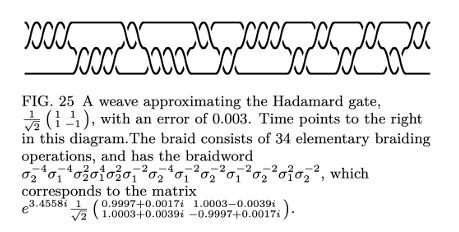

## Anyons

In [4]:
import numpy as np

# Fibonacci anyons
phi = (1 + np.sqrt(5)) / 2
sigma_1 = np.array([[np.exp(-4j * np.pi / 5), 0], [0, np.exp(3j * np.pi / 5)]])
sigma_2 = np.array([[np.exp(4j * np.pi / 5) / phi, np.exp(-3j * np.pi / 5) / np.sqrt(phi)],
                    [np.exp(-3j * np.pi / 5) / np.sqrt(phi), -1 / phi]])
sigma_1_inv = np.linalg.inv(sigma_1)
sigma_2_inv = np.linalg.inv(sigma_2)
generators = [sigma_1, sigma_2, sigma_1_inv, sigma_2_inv]

## GA Setup

In [5]:
import random
from tqdm import tqdm

np.seterr(all="ignore")

# Fitness function
def fitness(seq, unitary):
    M = unitary
    for idx in seq:
        M = np.dot(M, generators[idx])
    trace_M = np.trace(M)
    phase = trace_M / abs(trace_M)
    optimal_matrix = phase * np.eye(2)
    distance = np.linalg.norm(M - optimal_matrix, 'fro')
    return distance

# Point mutation function
def mutate(seq, mutation_rate=0.1):
    new_seq = seq[:]
    for i in range(len(seq)):
        if random.random() < mutation_rate:
            new_seq[i] = random.randint(0, len(generators) - 1)
    return new_seq

# Single-point crossover function
def crossover(seq1, seq2):
    crossover_point = random.randint(1, len(seq1) - 1)
    new_seq1 = seq1[:crossover_point] + seq2[crossover_point:]
    new_seq2 = seq2[:crossover_point] + seq1[crossover_point:]
    return new_seq1, new_seq2

# GA main loop with elitism
def genetic_algorithm(pop_size=2000, parents_ratio=0.01, generations=100, seq_length=50, mutation_rate=0.2):
    # Initialize population
    population = [[random.randint(0, len(generators) - 1) for _ in range(seq_length)] for _ in range(pop_size)]

    with tqdm(range(generations)) as pbar :
        for generation in pbar :
            # Evaluate fitness of each sequence
            fitness_scores = [(seq, fitness(seq, unitary)) for seq in population]
            fitness_scores.sort(key=lambda x: x[1])  # Sort by fitness (lower is better)

            # Keep the top half of the population (elitism)
            elites = [seq for seq, score in fitness_scores[:int(pop_size * parents_ratio)]]
            new_population = elites[:]

            # Create new population through crossover and mutation
            while len(new_population) < pop_size:
                # Randomly select two parents from elites
                parent1 = random.choice(elites)
                parent2 = random.choice(elites)

                # Crossover
                child1, child2 = crossover(parent1, parent2)

                # Mutation
                child1 = mutate(child1, mutation_rate)
                child2 = mutate(child2, mutation_rate)

                # Add to new population
                new_population.extend([child1, child2])

            # Trim population to maintain the original size
            population = new_population[:pop_size]

            # Print best fitness in this generation
            best_seq, best_fitness = fitness_scores[0]
            pbar.set_description(f'Generation {generation + 1}')
            pbar.set_postfix(best_fitness=best_fitness, best_seq=best_seq)

            # Stop if fitness is below a certain threshold
            if best_fitness < 0.001:
                print("Optimal solution found!")
                break

    return best_seq, best_fitness

In [6]:
# Target unitary
unitary = (1 / np.sqrt(2)) * np.array([[1, 1], [1, -1]])

# FItness of the example
seq = [1, 1, 2, 2, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 3, 3, 2, 2, 2, 2, 3, 3, 0, 0, 0, 0, 1, 1, 1, 1]
print(f'Fitness for the example: {fitness(seq, unitary)}')

# Run the genetic algorithm
best_sequence, best_fitness = genetic_algorithm()
print("Best sequence found:", best_sequence)
print("Best fitness:", best_fitness)

Fitness for the example: 0.0042299988636880035


  0%|          | 0/100 [00:00<?, ?it/s]


TypeError: fitness() missing 1 required positional argument: 'unitary'